In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, confusion_matrix, f1_score, precision_score, recall_score 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow
from tensorflow.keras.layers import Bidirectional, Conv1D, Dense, Flatten, LSTMCell, MaxPool1D, RNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

In [2]:
tensorflow.random.set_seed(1234)

In [3]:
DATASET_PATH = './dataset/processed_dataset/'
TENSORFLOW_SAVED_MODEL_PATH = './tensorflow_saved_models/'
IMAGE_PATH = './images/'

In [4]:
datasets = pd.concat([pd.read_csv(file) for file in glob.glob(DATASET_PATH + '*')])

In [5]:
datasets.head()

,50.0,71.75421209117937,93.50842418235877,115.26263627353815,137.01684836471753,158.7710604558969,180.52527254707638,202.2794846382557,224.0336967294351,245.78790882061452,...,21825.966303270565,21847.720515361747,21869.474727452925,21891.228939544104,21912.983151635282,21934.737363726465,21956.491575817643,21978.245787908818,22000.0,class
0,0.000801,0.001457,0.002129,0.002763,0.003370,0.003945,0.004515,0.005036,0.005538,0.005981,...,0.008532,0.008513,0.008491,0.008484,0.008457,0.008454,0.008432,0.008421,0.008423,nc1_ncn5121_no4
1,0.000827,0.001476,0.002096,0.002775,0.003362,0.003950,0.004512,0.005057,0.005534,0.005997,...,0.008506,0.008514,0.008490,0.008488,0.008481,0.008448,0.008445,0.008432,0.008418,nc1_ncn5121_no4
2,0.000770,0.001462,0.002094,0.002737,0.003353,0.003949,0.004500,0.005031,0.005541,0.005990,...,0.008520,0.008506,0.008494,0.008479,0.008482,0.008457,0.008447,0.008437,0.008416,nc1_ncn5121_no4
3,0.000819,0.001452,0.002100,0.002755,0.003370,0.003962,0.004510,0.005017,0.005528,0.005978,...,0.008524,0.008516,0.008474,0.008483,0.008479,0.008464,0.008442,0.008435,0.008425,nc1_ncn5121_no4
4,0.000884,0.001472,0.002113,0.002735,0.003354,0.003940,0.004498,0.005016,0.005539,0.005994,...,0.008494,0.008499,0.008505,0.008468,0.008469,0.008445,0.008433,0.008433,0.008388,nc1_ncn5121_no4


In [6]:
X = datasets.iloc[:, 0:1010]
y = datasets['class']

In [7]:
print(f'Dataset size: {len(X)}')

Dataset size: 5000


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42, train_size=0.70)

X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

y_train = list(y_train)
y_test = list(y_test)

input_shape = X_train.shape

In [9]:
print(f'Training dataset size: {len(X_train)}')
print(f'Test dataset size: {len(X_test)}')

Training dataset size: 3500
Test dataset size: 1500


In [10]:
NUMBER_OF_CLASSES = 10

In [11]:
class_mapping = {'nc1_ncn5121_no4': 0, 'nc1_ncn5121_no5': 1, 'nc1_switch_sl2': 2, 'nc1_switch_dem': 3, 'nc1_nodevice': 4,
                 'nc2_ncn5121_no4': 5, 'nc2_ncn5121_no5': 6, 'nc2_switch_sl2': 7, 'nc2_switch_dem': 8, 'nc2_nodevice': 9,}

In [12]:
classes = ['nc1_ncn5121_no4', 'nc1_ncn5121_no5', 'nc1_switch_sl2', 'nc1_switch_dem', 'nc1_nodevice', 'nc2_ncn5121_no4', 'nc2_ncn5121_no5', 'nc2_switch_sl2', 'nc2_switch_dem', 'nc2_nodevice']

In [13]:
y_train = np.array([class_mapping[label] for label in y_train])
y_test = np.array([class_mapping[label] for label in y_test])

In [14]:
y_train = to_categorical(y_train, NUMBER_OF_CLASSES).astype('int32')
y_test = to_categorical(y_test, NUMBER_OF_CLASSES).astype('int32')

In [15]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [16]:
def CLSTMClassifier():
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(input_shape[1], 1)))
    model.add(MaxPool1D(pool_size=2))
    model.add(Bidirectional(RNN(LSTMCell(32))))
    model.add(Flatten())
    model.add(Dense(100, input_shape=input_shape, activation='relu'))
    model.add(Dense(NUMBER_OF_CLASSES, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
        
    return model

In [17]:
c_lstm = CLSTMClassifier()
c_lstm.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 1008, 64)          256       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 504, 64)           0         
_________________________________________________________________
bidirectional (Bidirectional (None, 64)                24832     
_________________________________________________________________
flatten (Flatten)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 100)               6500      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 32,598
Trainable params: 32,598
Non-trainable params: 0
____________________________________________________

In [18]:
X_train_reshaped = np.reshape(X_train, (input_shape[0], input_shape[1], 1))
X_train_reshaped.shape

(3500, 1010, 1)

In [19]:
X_test_reshaped = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_test_reshaped.shape

(1500, 1010, 1)

In [20]:
history_c_lstm = c_lstm.fit(X_train_reshaped, y_train, epochs=50, verbose=2, validation_split=0.2)

Epoch 1/50
88/88 - 30s - loss: 1.1556 - accuracy: 0.6164 - val_loss: 0.4091 - val_accuracy: 0.8900
Epoch 2/50
88/88 - 31s - loss: 0.2815 - accuracy: 0.8879 - val_loss: 0.2152 - val_accuracy: 0.9386
Epoch 3/50
88/88 - 29s - loss: 0.2087 - accuracy: 0.9196 - val_loss: 0.2112 - val_accuracy: 0.9043
Epoch 4/50
88/88 - 31s - loss: 0.1916 - accuracy: 0.9254 - val_loss: 0.1968 - val_accuracy: 0.9000
Epoch 5/50
88/88 - 32s - loss: 0.1540 - accuracy: 0.9414 - val_loss: 0.1643 - val_accuracy: 0.9357
Epoch 6/50
88/88 - 31s - loss: 0.1437 - accuracy: 0.9425 - val_loss: 0.1315 - val_accuracy: 0.9557
Epoch 7/50
88/88 - 33s - loss: 0.1310 - accuracy: 0.9454 - val_loss: 0.1275 - val_accuracy: 0.9571
Epoch 8/50
88/88 - 28s - loss: 0.1136 - accuracy: 0.9561 - val_loss: 0.1352 - val_accuracy: 0.9400
Epoch 9/50
88/88 - 32s - loss: 0.1164 - accuracy: 0.9546 - val_loss: 0.1196 - val_accuracy: 0.9500
Epoch 10/50
88/88 - 36s - loss: 0.0972 - accuracy: 0.9604 - val_loss: 0.0929 - val_accuracy: 0.9571
Epoch 11/

In [21]:
 def get_report(model):
    pred = model.predict(X_test_reshaped)
    predictions = (pred > 0.5).astype("int32")
    print(classification_report(y_test, predictions, target_names=classes))
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions,  average='macro')
    recall = recall_score(y_test, predictions, average='macro')
    f1 = f1_score(y_test, predictions, average='macro')
    
    return accuracy, precision, recall, f1, predictions

In [22]:
c_lstm_score = get_report(c_lstm)
predictions = c_lstm_score[4]
print(f'Accuracy: {c_lstm_score[0]}')
print(f'Precision: {c_lstm_score[1]}')
print(f'Recall: {c_lstm_score[2]}')
print(f'F1-Score: {c_lstm_score[3]}')

                 precision    recall  f1-score   support

nc1_ncn5121_no4       1.00      1.00      1.00       150
nc1_ncn5121_no5       1.00      1.00      1.00       150
 nc1_switch_sl2       1.00      1.00      1.00       150
 nc1_switch_dem       1.00      1.00      1.00       150
   nc1_nodevice       1.00      1.00      1.00       150
nc2_ncn5121_no4       0.99      1.00      0.99       150
nc2_ncn5121_no5       1.00      0.99      0.99       150
 nc2_switch_sl2       0.98      0.89      0.93       150
 nc2_switch_dem       0.90      0.98      0.94       150
   nc2_nodevice       1.00      1.00      1.00       150

      micro avg       0.99      0.99      0.99      1500
      macro avg       0.99      0.99      0.99      1500
   weighted avg       0.99      0.99      0.99      1500
    samples avg       0.99      0.99      0.99      1500

Accuracy: 0.986
Precision: 0.9866784785841727
Recall: 0.986
F1-Score: 0.985976110805604


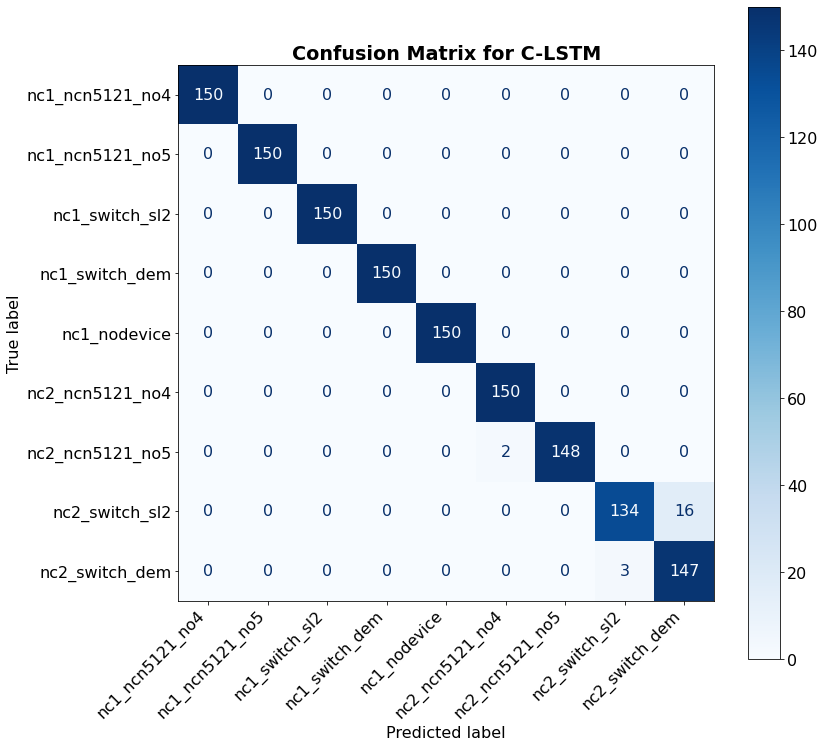

In [23]:
plt.rcParams.update({'font.size': 16})

fig = plt.figure(figsize=(12, 12))
fig.tight_layout()
ax = fig.add_subplot(111)
plt.title('Confusion Matrix for C-LSTM', fontweight='bold')

cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(predictions, axis=1), labels=range(9))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)

disp.plot(ax=ax, cmap='Blues', values_format='')
plt.xticks(rotation=45, ha='right')

plt.savefig(IMAGE_PATH + 'c_lstm_confusion_matrix.pdf', bbox_inches='tight')

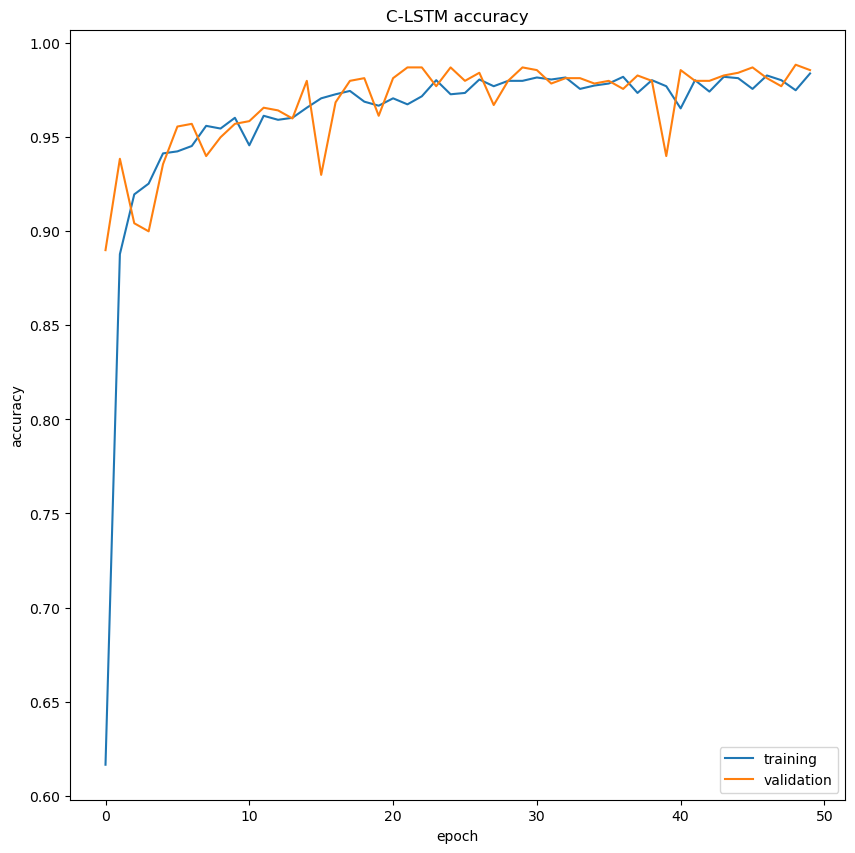

In [24]:
plt.rcdefaults()
fig = plt.figure(figsize=(10, 10))

plt.plot(history_c_lstm.history['accuracy'])
plt.plot(history_c_lstm.history['val_accuracy'])
plt.title('C-LSTM accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='lower right')

plt.savefig(IMAGE_PATH + 'c_lstm_accuracy.pdf', bbox_inches='tight')

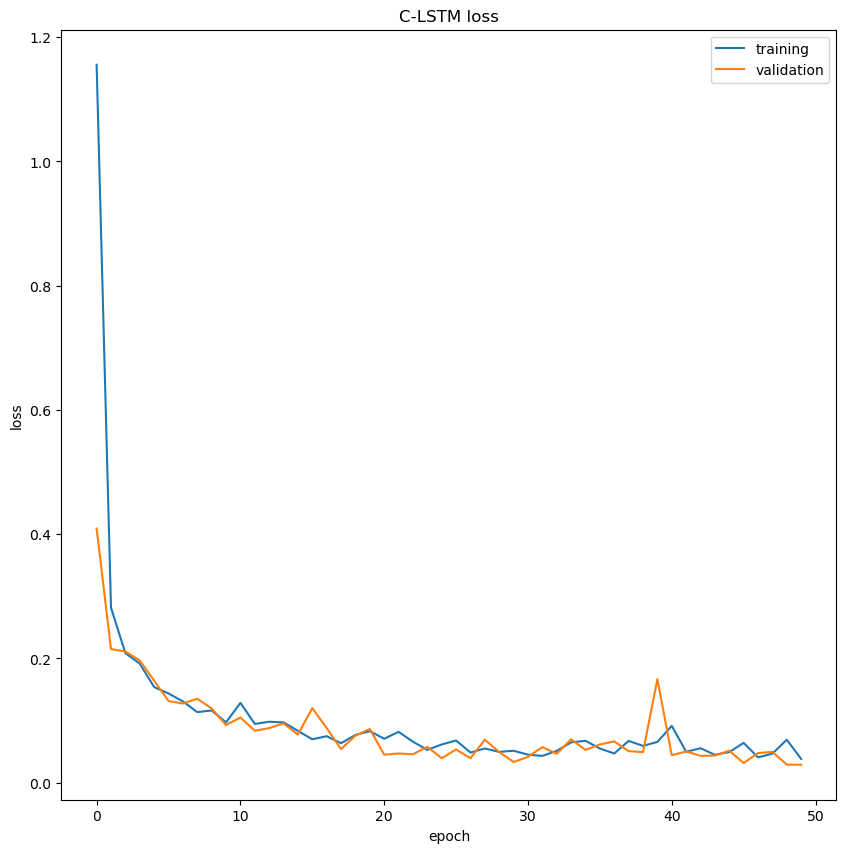

In [25]:
fig = plt.figure(figsize=(10, 10))

plt.plot(history_c_lstm.history['loss'])
plt.plot(history_c_lstm.history['val_loss'])
plt.title('C-LSTM loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper right')

plt.savefig(IMAGE_PATH + 'c_lstm_loss.pdf', bbox_inches='tight')

# Save TensorFlow Model

In [26]:
c_lstm.save(TENSORFLOW_SAVED_MODEL_PATH + 'c_lstm_saved_model')

INFO:tensorflow:Assets written to: ./tensorflow_saved_models/c_lstm_saved_model\assets
